> Мы располагаем некоторыми данными о конкурентном рынке товара А. Необходимо выяснить, чему равна эластичность предложения товара А по его цене. Выберать подходящую для ответа на этот вопрос эмпирическую стратегию. Осуществить все необходимые расчеты, провести нужные тесты. > Интерпретировать полученные результаты.


Рассматриваются следующие переменные:
| Переменная | 	Описание |
|------------|--------------------------------------------------------------------------------------------------------|
| 𝑄𝑖	| потребление товара А на душу населения в 𝑖-м городе (кг в год)|
| 𝑃𝐴𝑖  | средняя цена товара в 𝑖 -м городе (руб. за кг)  |
| 𝑇𝑖	 | средняя ставка акциза, уплачиваемая продавцами товара А (руб. за кг), в 𝑖 -м городе |
| 𝐼𝑖	 | доход на душу населения в 𝑖-м городе (тыс. руб. в месяц)  |
| 𝑃𝐵𝑖  | цена товара B, который является товаром-заменителем для товара А, в 𝑖-м городе (руб. за кг)  |
| 𝑃𝐶𝑖   | цена товара С, который используется в качестве сырья для изготовления товара А, в 𝑖-м городе (руб. за кг)  |



In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import seaborn as sns 
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import linear_reset

#считываем данные из файла CollegeDistance.xls
data = pd.read_excel('equilibrium-2024.xlsx')

In [3]:
print(data.head())

              I        PC        PB         T         PA          Q
0  13514.632662  2.333654  7.388250  1.471499  35.613546  65.111413
1    579.373848  2.350336  5.438696  1.384501  10.715418  20.503618
2   2988.688327  2.589264  4.803780  1.086057  20.493162  24.370490
3    297.877785  1.904863  1.472556  2.061214  14.098867   3.485620
4      2.817489  1.477954  7.137148  1.362774   2.386796   4.930955


Выводим описательную статистику, чтоб проверить наличие выбросов и накооректности в данных:

In [4]:
print(data.describe())

                  I          PC          PB           T          PA  \
count    200.000000  200.000000  200.000000  200.000000  200.000000   
mean    2363.691342    1.745247    3.360106    1.699374    8.804380   
std     4941.684933    0.489020    1.894447    0.482891    7.188655   
min        1.136641    1.000613    1.027645    1.001109    1.149333   
25%        9.029401    1.305480    1.725849    1.293769    3.059913   
50%       99.224229    1.727132    2.791364    1.603152    6.515235   
75%     1288.916057    2.176980    4.825194    2.061599   12.354592   
max    21047.009951    2.689435    7.388250    2.716084   35.613546   

                Q  
count  200.000000  
mean    32.463130  
std     63.390089  
min      0.185930  
25%      2.397374  
50%      7.223964  
75%     27.166052  
max    397.762187  


Проверим данные на наличие мултиколлинеарности:

In [5]:
print(data.corr())

           I        PC        PB         T        PA         Q
I   1.000000 -0.135766 -0.023583 -0.096470  0.679944  0.687609
PC -0.135766  1.000000  0.072730  0.074474  0.033104 -0.194101
PB -0.023583  0.072730  1.000000 -0.033148  0.179731  0.135603
T  -0.096470  0.074474 -0.033148  1.000000  0.191272 -0.186785
PA  0.679944  0.033104  0.179731  0.191272  1.000000  0.364340
Q   0.687609 -0.194101  0.135603 -0.186785  0.364340  1.000000


По корелляционной матрице можно утверждать, что товар А - товар Гиффена, так как наблюдается положительная корреляция между средней ценой товара и его потреблением: с увеличением цены потребление растет. Попробуем опровергнуть или убедиться в это построив модель иножественной линейной регрессии.


Остальные показатели удовлетворяют ожиданиям. Достаточно сильная корреляция между доходом на душу населения и потреблением (что ожидаемо, так у людей появляется больше средств на покупку товара потребления). С ростом цены на сырье или с ростом налога растет и цена товара (дополнительные издержки идут в цену товара, чтобы покрывать себестоимость).

Попробуем немного иначе специфицировать модель для более верной интерпретации коэффициента потребления. С помощью логарифмирования стабилизируем дисперсию и уменьшим влияние выбросов.

In [14]:
data['ln_Q'] = data['Q'].apply(np.log)
data['ln_PA'] = data['PA'].apply(np.log)
data['ln_I'] = data['I'].apply(np.log)
data['ln_PB'] = data['PB'].apply(np.log)
data['ln_PC'] = data['PC'].apply(np.log)
data['ln_T'] = data['T'].apply(np.log)

/Users/tatanakuznecova/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


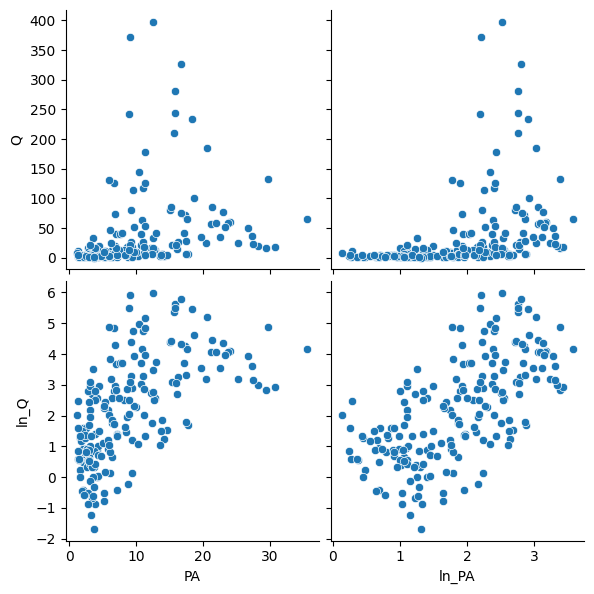

In [24]:
sns.pairplot(
    data,
    y_vars=['Q', 'ln_Q'],
    x_vars=['PA', 'ln_PA'],
    size=3,
    diag_kind=None
)

/Users/tatanakuznecova/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


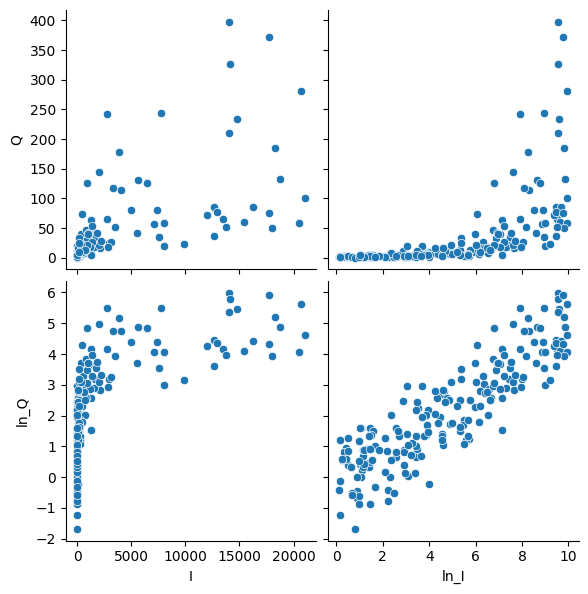

In [23]:
sns.pairplot(
    data,
    y_vars=['Q', 'ln_Q'],
    x_vars=['I', 'ln_I'],
    size=3,
    diag_kind=None
)

/Users/tatanakuznecova/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


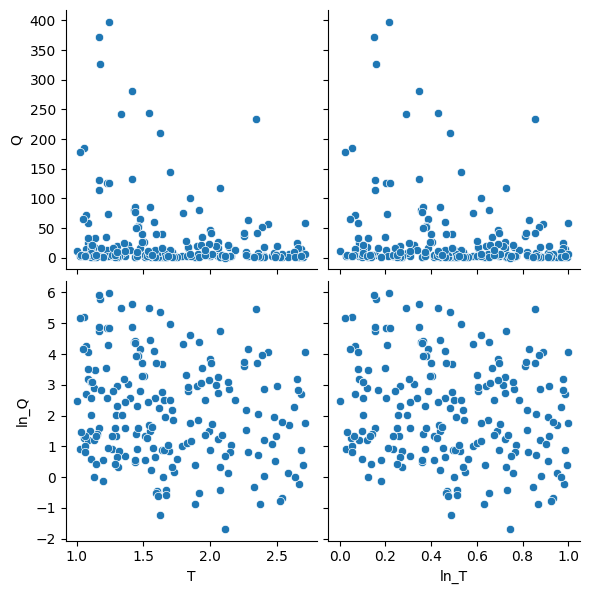

In [26]:
sns.pairplot(
    data,
    y_vars=['Q', 'ln_Q'],
    x_vars=['T', 'ln_T'],
    size=3,
    diag_kind=None
)

Видим, что связь линейна именно на график логарифмированных переменных, что нам больше подходит для создания корректной модели линейной регрессии.

Построим модель множественной линейной регрессии для обеих спецификаций и сравним их показатели, чтобы выбрать наиболее точно описывающую данные.

In [8]:
model = smf.ols('Q ~ I + PA + PB + PC + T', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     45.65
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           5.07e-31
Time:                        16:24:23   Log-Likelihood:                -1035.4
No. Observations:                 200   AIC:                             2083.
Df Residuals:                     194   BIC:                             2103.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.1047     16.908      1.958      0.052      -0.243      66.453
I              0.0106      0.001     11.245      0.000       0.009       0.012
PA            -1.9354      0.662     -2.922      0.004      -3.242      -0.629
PB             6.6582      1.708      3.897      0.000       3.289      10.028
PC           -11.0729      6.466     -1.712      0.088     -23.826       1.681
T             -6.8615      6.929     -0.990      0.323     -20.527       6.804
==============================================================================
Omnibus:                      106.320   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              792.070
Skew:                           1.890   Prob(JB):                    1.01e-172
Kurtosis:                      11.986   Cond. No.                     3.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Проведем тест на гомоскедастичность: (проверим постоянна ли дисперсия случайной ошибки у различных налблюдений)

In [52]:
model = smf.ols('ln_Q ~ ln_I + ln_PA + ln_PB + PC + T', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ln_Q   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1261.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          8.12e-146
Time:                        01:48:23   Log-Likelihood:                -36.070
No. Observations:                 200   AIC:                             84.14
Df Residuals:                     194   BIC:                             103.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0442      0.119      0.371      0.711      -0.191       0.279
ln_I           0.9413      0.019     50.256      0.000       0.904       0.978
ln_PA         -1.7980      0.070    -25.574      0.000      -1.937      -1.659
ln_PB          0.9642      0.039     24.751      0.000       0.887       1.041
PC            -0.0249      0.044     -0.561      0.576      -0.112       0.063
T             -0.0293      0.051     -0.580      0.563      -0.129       0.070
==============================================================================
Omnibus:                       58.349   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.482
Skew:                           0.070   Prob(JB):                      0.00529
Kurtosis:                       1.887   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, что коэффициент детерминации значительно больше в новой спецификации модели, также сильно меньше стали показатели стандартных ошибок. Значит для ответа на вопросы по модели и проведения тестов, возьмем модель с логарифмированными переменными.

In [42]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 7.740786681864886),
 ('p-value', 0.171111879263959),
 ('f-value', 1.5621749307762707),
 ('f p-value', 0.17256344864894788)]

p-значение достаточно больше, значит, не отвергаем гипотезу об отсутсвии гетероскедастичности. Таким образом не только оценки коэффициентов модели получаются несмещенными и состоятельными (предпосылки не нарушены), но и оставшиеся оценки корректны. Значит, поправка на гетероскедастичность не является необходимой.

Однако проведем корректировку, чтобы убедиться, что случайные ошибки и другие коэффициенты практически не поменяются.

In [44]:
model = smf.ols('ln_Q ~ ln_I + ln_PA + ln_PB + PC + T', data=data)
res=model.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_Q   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1351.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          1.28e-148
Time:                        16:48:41   Log-Likelihood:                -36.070
No. Observations:                 200   AIC:                             84.14
Df Residuals:                     194   BIC:                             103.9
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0442      0.121      0.365      0.7

Проведем тест Рамсея для проверки правильности спецификации модели:

H0: модель специфицирована адекватно

H1: нужно менять спецификацию

In [46]:
reset_test = linear_reset(res)
print(reset_test)

<Wald test (chi2): statistic=0.06229512962109774, p-value=0.9693325231515804, df_denom=2>


p-значение больше уровня значимости 


alpha = 0.05 < 0.9700680773318844 = р-значение

Значит, не отвергаем Н0 и спецификация верна

Для интерпретации модели нужно провести тесты на значимость переменных и посмотреть, присутствуют ли в модели переменные, не значимые на уровне 5%, что поставит под сомнение корректность интерпертации модели.

In [64]:
t_statistic = res.tvalues['ln_PA']
p_value = res.pvalues['ln_PA']

print("t-статистика:", t_statistic)
print("p-значение:", p_value)

t-статистика: -25.573694037261593
p-значение: 4.730597257680996e-64


In [65]:
t_statistic = res.tvalues['ln_PB']
p_value = res.pvalues['ln_PB']

print("t-статистика:", t_statistic)
print("p-значение:", p_value)


t-статистика: 24.75099771553498
p-значение: 6.120967160014201e-62


In [61]:
t_statistic = res.tvalues['PC']
p_value = res.pvalues['PC']

print("t-статистика:", t_statistic)
print("p-значение:", p_value)


t-статистика: -0.5607325722322211
p-значение: 0.5756268889829176


In [66]:
t_statistic = res.tvalues['T']
p_value = res.pvalues['T']

print("t-статистика:", t_statistic)
print("p-значение:", p_value)

t-статистика: -0.5797189592795974
p-значение: 0.5627767813165073


In [67]:
t_statistic = res.tvalues['ln_I']
p_value = res.pvalues['ln_I']

print("t-статистика:", t_statistic)
print("p-значение:", p_value)

t-статистика: 50.255542732032524
p-значение: 3.490246072060607e-113


Согласно тестам видим, что переменные PC и Т назначимы на уровне 5% - избыточные переменные.

Значит, упростим модель с целью улучшения ее интерпретируемости, сокращения размерности пространства признаков, уменьшения временных и вычислительных затрат на построение и эксплуатацию модели.

In [68]:
model = smf.ols('ln_Q ~ ln_I + ln_PA + ln_PB', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ln_Q   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2117.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          5.20e-149
Time:                        13:06:35   Log-Likelihood:                -36.384
No. Observations:                 200   AIC:                             80.77
Df Residuals:                     196   BIC:                             93.96
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0368      0.059     -0.627      0.531      -0.152       0.079
ln_I           0.9486      0.016     59.399      0.000       0.917       0.980
ln_PA         -1.8271      0.058    -31.489      0.000      -1.942      -1.713
ln_PB          0.9705      0.038     25.840      0.000       0.896       1.045
==============================================================================
Omnibus:                       60.864   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.565
Skew:                           0.051   Prob(JB):                      0.00508
Kurtosis:                       1.879   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Получается, что при увеличении дохода на душу населения на 1% потребление товара А увеличивается на 0.95% (эластичность потребления товара А на душу населения по доходу на душу населения)

При увеличении цены товара А на 1% его потребление уменьшается на 1.8% (эластичность потребления товара А по его цене)
Таким образом, товар А не является товаром Гиффена, а является нормальным благом.

При увеличении цены на товар, являющийся товаром-заменителем на товар А, потребление товара А увеличивается на 0.97% (эластичность потребления товара А по цене на товар-заменитель)
